In [2]:
from datetime import  datetime
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import configparser
import pandas as pd
import numpy as np

In [ ]:
my_df =  pd.read_excel('file.xlsx')

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [6]:
config['GMAIL']['server']

'smtp.gmail.com'

In [9]:
def send_email(email_recipients, email_subject, email_body):
    message =  MIMEMultipart()
    message['From'] = config['GMAIL']['sender']
    message['To'] =  email_recipients
    message['Subject'] = email_subject

    message.attach(MIMEText(email_body,'plain'))

    with smtplib.SMTP(config['GMAIL']['server'], config['GMAIL']['port']) as mail_server:
        mail_server.starttls()  # starts the connection 
        mail_server.login(config['GMAIL']['sender'],config['GMAIL']['password'])
        mail_server.send_message(message)
    print('Sent')

In [10]:
send_email('operationalanalytics2@gmail.com','Hello Fabian','This is our email account')

Sent


In [15]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from email.mime.image import MIMEImage
import tempfile

In [22]:

def send_html_email(recipients,subject,html_content, sns_graph):

  # Create the email message
    msg = MIMEMultipart('mixed')
    msg['From'] = config['GMAIL']['sender']
    msg['To'] = recipients #LIST  ['mail1@gmail.com','othermail@outlook.com']
    msg['Subject'] = subject

    # Attach HTML content to the email
    html_part = MIMEText(html_content, 'html')
    msg.attach(html_part)

    # Attach the image file to the email
    temp_file = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    sns_graph.figure.savefig(temp_file.name)
    #temp_file.close()
    #with open(temp_file.name, 'rb') as fp:
        #img = MIMEImage(fp.read())
    img = MIMEImage(temp_file.read())
    temp_file.close()
    img.add_header('Content-Disposition', 'inline', filename="seaborn_plot.png")
    img.add_header('Content-ID', '<seaborn_plot.png>')  # IMPORTANT  MATCH
    msg.attach(img)

    # Connect to the SMTP server and send the email
    with smtplib.SMTP(config['GMAIL']['server'], config['GMAIL']['port']) as server:
        server.starttls()
        server.login(config['GMAIL']['sender'], config['GMAIL']['password'])
        server.send_message(msg)
    
    print("Email sent")

In [23]:
html_content = """
  <html>
    <body>
      <h2>Ball Joint</h2>
      <p>Sending ball joint lineplot via gmail:</p>
      <img src="cid:seaborn_plot.png" alt="Seaborn Line Plot">
    </body>
  </html>
  """

In [13]:
data_df = pd.read_excel('dog_treats_data.xlsx')
data_df.head()

,sample_no,x1,x2,x3,x4,x5
0,1,224,220,221,222,224
1,2,222,220,221,223,223
2,3,223,221,224,224,221
3,4,223,221,223,223,223
4,5,223,221,221,223,220


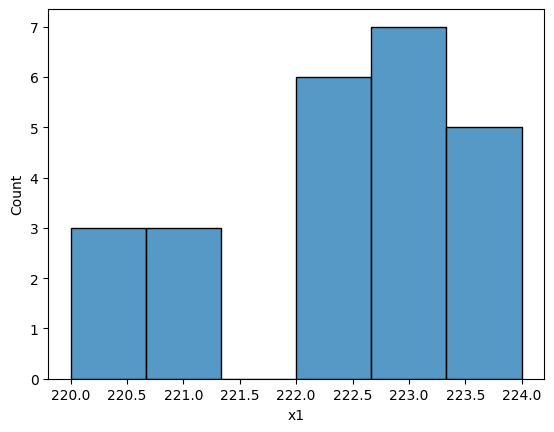

In [19]:
sns_plot = sns.histplot(data=data_df,x='x1')

In [24]:
send_html_email('operationalanalytics2@gmail.com','Send a seaborn plot',html_content,sns_plot)

Email sent
